In [111]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import glob
import skimage
from skimage.color import rgb2hsv

In [112]:
#zip olarak yüklenen resimleri çıkartıyor.
from zipfile import ZipFile
file_name = 'HWData.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


<ipython-input-260-a989e7d27336>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  accordion = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/accordion/*.jpg")])
<ipython-input-260-a989e7d27336>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/accordion/*.jpg")])
<ipython-input-260-a989e7d27336>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

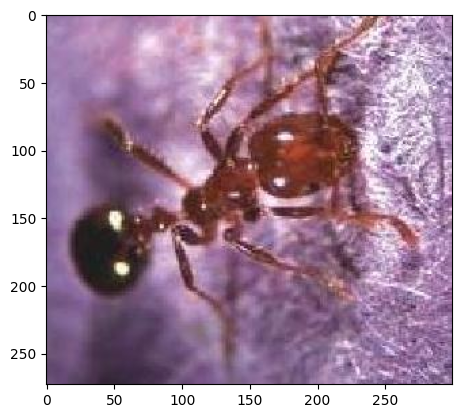

In [260]:
#imageleri rgb olarak aldım.
accordion = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/accordion/*.jpg")])
images = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/accordion/*.jpg")])
airplanes = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/airplanes/*.jpg")])
images = np.hstack((images,airplanes))
BACKGROUND_Google = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/BACKGROUND_Google/*.jpg")])
images = np.hstack((images,BACKGROUND_Google))
anchor = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/anchor/*.jpg")])
images = np.hstack((images,anchor))
ant = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/ant/*.jpg")])
images = np.hstack((images,ant))
barrel = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/barrel/*.jpg")])
images = np.hstack((images,barrel))
bass = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/bass/*.jpg")])
images = np.hstack((images,bass))
beaver = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/beaver/*.jpg")])
images = np.hstack((images,beaver))
binocular = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/binocular/*.jpg")])
images = np.hstack((images,binocular))
bonsai = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/bonsai/*.jpg")])
images = np.hstack((images,bonsai))
brain = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/brain/*.jpg")])
images = np.hstack((images,brain))
brontosaurus = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/brontosaurus/*.jpg")])
images = np.hstack((images,brontosaurus))
buddha = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/buddha/*.jpg")])
images = np.hstack((images,buddha))
butterfly = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/butterfly/*.jpg")])
images = np.hstack((images,butterfly))
camera = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/camera/*.jpg")])
images = np.hstack((images,camera))

for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

plt.imshow(images[136])


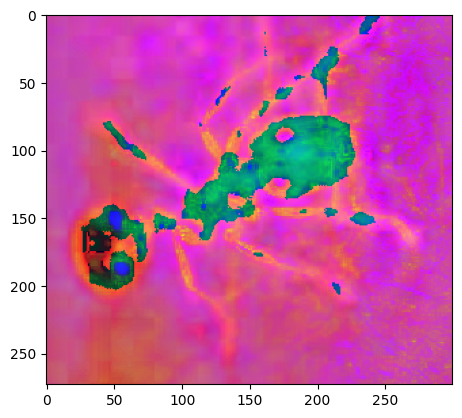

In [261]:
#rgb hsv dönüşümü
hsv_images = []
for i in range(len(images)):
  hsv_images.append(rgb2hsv(images[i]))

plt.imshow(hsv_images[136])

In [272]:
#her resimden feature değerlerini bulup 1x500 arrayler oluşturdum.

x_matris =[[0 for x in range(500)] for y in range(len(hsv_images))]

for i in range(len(hsv_images)):
  feature = skimage.feature.multiscale_basic_features(hsv_images[i], intensity=True, edges=True, texture=False, sigma_min=0.5, sigma_max=16, num_sigma=None, num_workers=None, channel_axis=None)
  feature = feature.reshape(-1)
  for j in range(500):
    x_matris[i][j] = feature[j]




/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


2667600


In [284]:
#sınıf bilgilerini tutan matrisi oluşturdum.

y_matris =['accordion' for y in range(len(hsv_images))]


for i in range(len(accordion)):
  y_matris[i] = 'accordion'

index = len(accordion)

for i in range(len(airplanes)):
  y_matris[i + index] = 'airplanes'

index = index + len(airplanes)
for i in range(len(BACKGROUND_Google)):
  y_matris[i + index] = 'BACKGROUND_Google'

index = index + len(BACKGROUND_Google)
for i in range(len(anchor)):
  y_matris[i + index] = 'anchor'

index = index + len(anchor)
for i in range(len(ant)):
  y_matris[i + index] = 'ant'

index = index + len(ant)
for i in range(len(barrel)):
  y_matris[i + index] = 'barrel'

index = index + len(barrel)
for i in range(len(bass)):
  y_matris[i + index] = 'bass'

index = index + len(bass)
for i in range(len(beaver)):
  y_matris[i + index] = 'beaver'

index = index + len(beaver)
for i in range(len(binocular)):
  y_matris[i + index] = 'binocular'

index = index + len(binocular)
for i in range(len(bonsai)):
  y_matris[i + index] = 'bonsai'

index = index + len(bonsai)
for i in range(len(brain)):
  y_matris[i + index] = 'brain'

index = index + len(brain)
for i in range(len(brontosaurus)):
  y_matris[i + index] = 'brontosaurus'

index = index + len(brontosaurus)
for i in range(len(buddha)):
  y_matris[i + index] = 'buddha'

index = index + len(buddha)
for i in range(len(butterfly)):
  y_matris[i + index] = 'butterfly'

index = index + len(butterfly)
for i in range(len(camera)):
  y_matris[i + index] = 'camera'

index = index + len(camera)


In [268]:
#x ve y matrislerini svc ile modelledim.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf.fit(x_matris, y_matris)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [283]:
#bir test image'ini kullanarak modeli test ettim.

test_image = cv2.imread("/content/HWData/test/BACKGROUND_Google/image_0425.jpg")

test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

test_image = rgb2hsv(test_image)

feature = skimage.feature.multiscale_basic_features(test_image, intensity=True, edges=True, texture=True, sigma_min=0.5, sigma_max=16, num_sigma=None, num_workers=None, channel_axis=None)
feature = feature.reshape(-1)

test_feature = [0 for x in range(500)]

for i in range(500):
  test_feature[i] = feature[i]

print(clf.predict([test_feature]))


/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


['BACKGROUND_Google']
